In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch . nn as nn
import torch . optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
Train_data = pd.read_csv('Train_Scaled_Cont_OH.csv')
Validation_data = pd.read_csv('Valid_Scaled_Cont_OH.csv')
Test_data = pd.read_csv('Test_Scaled_Cont_OH.csv')
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 51 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             12000 non-null  float64
 1   AnnualIncome                    12000 non-null  float64
 2   CreditScore                     12000 non-null  float64
 3   Experience                      12000 non-null  float64
 4   LoanAmount                      12000 non-null  float64
 5   LoanDuration                    12000 non-null  float64
 6   NumberOfDependents              12000 non-null  float64
 7   MonthlyDebtPayments             12000 non-null  float64
 8   CreditCardUtilizationRate       12000 non-null  float64
 9   NumberOfOpenCreditLines         12000 non-null  float64
 10  NumberOfCreditInquiries         12000 non-null  float64
 11  DebtToIncomeRatio               12000 non-null  float64
 12  BankruptcyHistory               

In [3]:
Train_data.head()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,HomeStat_Other,HomeStat_Own,HomeStat_Rent,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,LoanApproved,RiskScore
0,1.487718,-0.305854,-1.172820,1.549408,-0.674158,-1.226708,0.342057,-0.214488,0.484836,-0.582020,...,0,0,1,0,0,0,1,0,0,0.030033
1,-0.740634,-0.364793,0.315682,-1.006777,1.288418,1.217582,1.776507,-0.615700,1.204039,-0.582020,...,0,0,0,0,1,0,0,0,0,-0.098772
2,0.030718,0.698946,0.746564,0.050955,-0.530405,-0.737850,1.776507,0.236358,-0.793350,-1.155533,...,0,0,0,0,0,1,0,0,0,0.287644
3,1.659129,3.766004,1.862940,1.637552,-0.381553,0.239866,-1.092394,-0.218624,0.037575,-0.582020,...,0,0,0,1,0,0,0,0,1,-2.211181
4,-0.654928,-0.121030,0.061069,-0.477911,0.913035,-0.248992,-0.375169,0.352171,-0.615671,-1.155533,...,0,0,0,0,0,1,0,0,0,0.287644


In [4]:
X_training = Train_data.drop('LoanApproved',axis=1)
X_training = Train_data.drop('RiskScore',axis=1)
y_training = Train_data['LoanApproved']

In [5]:
y_training.min()

0

In [6]:
X_validation = Validation_data.drop('LoanApproved',axis=1)
X_validation = Validation_data.drop('RiskScore',axis=1)
y_validation = Validation_data['LoanApproved']

In [7]:
X_testing = Test_data.drop('LoanApproved',axis=1)
X_testing = Test_data.drop('RiskScore',axis=1)
y_testing = Test_data['LoanApproved']

In [8]:
class SingleLayer(nn.Module):
    def __init__(self, input_size, hidden1):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

In [9]:
X_training = X_training.values
y_training = y_training.values
X_validation = X_validation.values
y_validation = y_validation.values
X_testing = X_testing.values
y_testing = y_testing.values

In [10]:
print(y_training)

[0 0 0 ... 1 0 0]


In [11]:
X_train, y_train = torch.tensor(X_training, dtype=torch.float32), torch.tensor(y_training, dtype=torch.float32).view(-1, 1)
X_val, y_val = torch.tensor(X_validation, dtype=torch.float32), torch.tensor(y_validation, dtype=torch.float32).view(-1, 1)
X_test, y_test = torch.tensor(X_testing, dtype=torch.float32), torch.tensor(y_testing, dtype=torch.float32).view(-1, 1)

In [14]:
class DoubleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.621656
1  0.620144
2  0.618643
3  0.617151
4  0.615671
Validation Data
Confusion Matrix for hidden layer 8 and 8
[[3038    6]
 [   7  949]]
Accuracy: 0.9968, Precision: 0.9937, Recall: 0.9927, F1-score: 0.9932

Test Data
Confusion Matrix for hiden layer 8 and 8
[[3041    3]
 [   9  947]]
Accuracy: 0.9970, Precision: 0.9968, Recall: 0.9906, F1-score: 0.9937



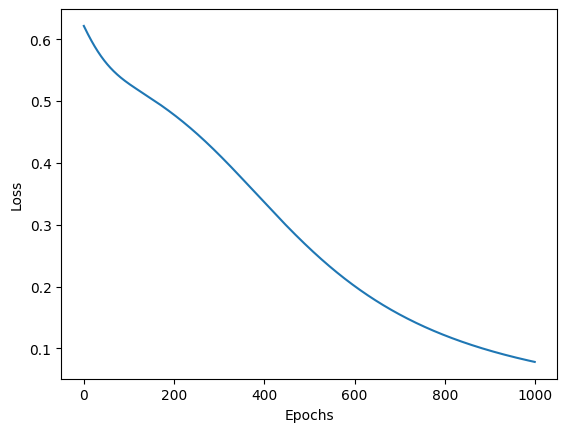

Training Losses are 
          0
0  0.611994
1  0.609905
2  0.607846
3  0.605817
4  0.603821
Validation Data
Confusion Matrix for hidden layer 8 and 16
[[3038    6]
 [   2  954]]
Accuracy: 0.9980, Precision: 0.9938, Recall: 0.9979, F1-score: 0.9958

Test Data
Confusion Matrix for hiden layer 8 and 16
[[3040    4]
 [   2  954]]
Accuracy: 0.9985, Precision: 0.9958, Recall: 0.9979, F1-score: 0.9969



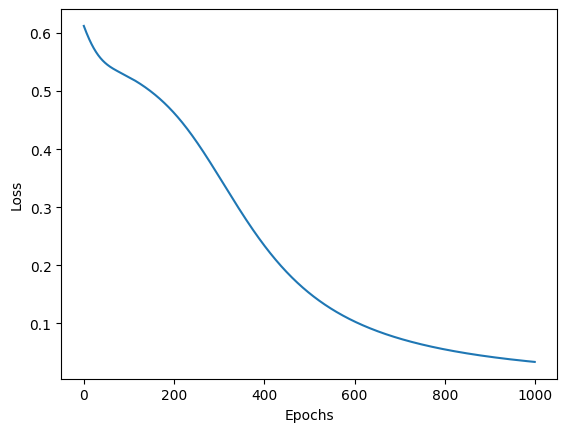

Training Losses are 
          0
0  0.662871
1  0.657819
2  0.652891
3  0.648090
4  0.643417
Validation Data
Confusion Matrix for hidden layer 8 and 32
[[3039    5]
 [   2  954]]
Accuracy: 0.9982, Precision: 0.9948, Recall: 0.9979, F1-score: 0.9963

Test Data
Confusion Matrix for hiden layer 8 and 32
[[3041    3]
 [   2  954]]
Accuracy: 0.9988, Precision: 0.9969, Recall: 0.9979, F1-score: 0.9974



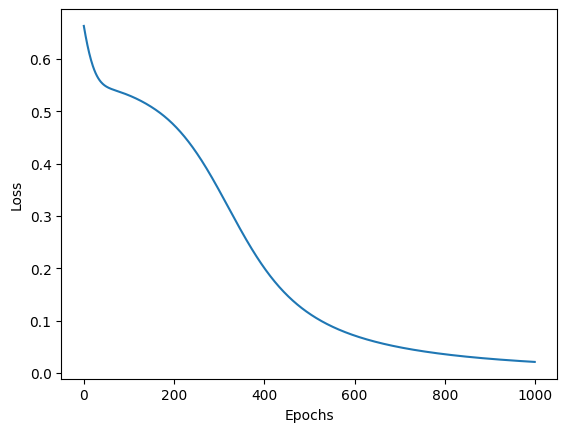

Training Losses are 
          0
0  0.800611
1  0.787281
2  0.774326
3  0.761752
4  0.749567
Validation Data
Confusion Matrix for hidden layer 8 and 64
[[3039    5]
 [   1  955]]
Accuracy: 0.9985, Precision: 0.9948, Recall: 0.9990, F1-score: 0.9969

Test Data
Confusion Matrix for hiden layer 8 and 64
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979



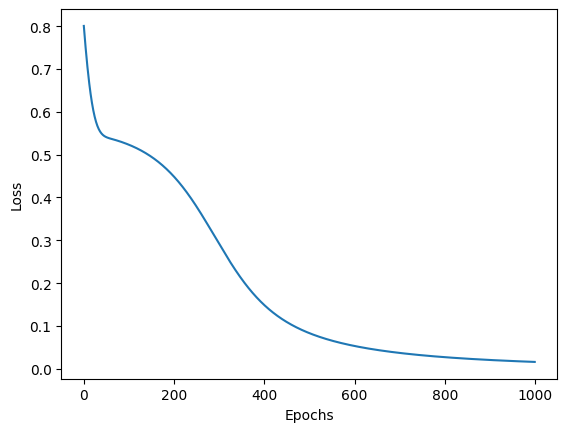

Training Losses are 
          0
0  0.573753
1  0.572752
2  0.571767
3  0.570799
4  0.569850
Validation Data
Confusion Matrix for hidden layer 16 and 8
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979

Test Data
Confusion Matrix for hiden layer 16 and 8
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979



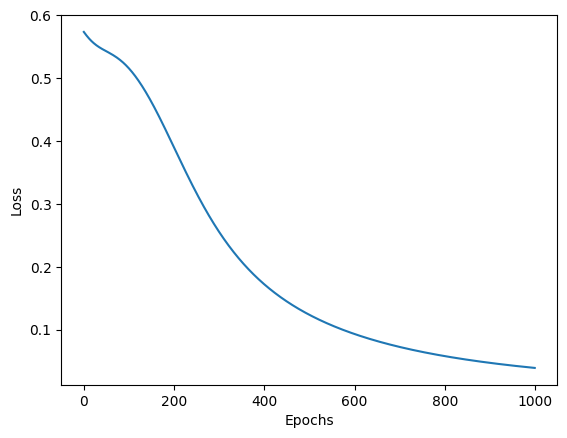

Training Losses are 
          0
0  0.614367
1  0.612122
2  0.609915
3  0.607748
4  0.605621
Validation Data
Confusion Matrix for hidden layer 16 and 16
[[3039    5]
 [   2  954]]
Accuracy: 0.9982, Precision: 0.9948, Recall: 0.9979, F1-score: 0.9963

Test Data
Confusion Matrix for hiden layer 16 and 16
[[3041    3]
 [   2  954]]
Accuracy: 0.9988, Precision: 0.9969, Recall: 0.9979, F1-score: 0.9974



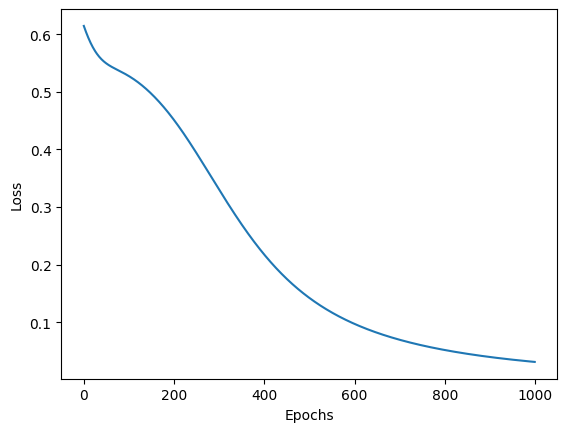

Training Losses are 
          0
0  0.692664
1  0.686776
2  0.681027
3  0.675417
4  0.669947
Validation Data
Confusion Matrix for hidden layer 16 and 32
[[3041    3]
 [   0  956]]
Accuracy: 0.9992, Precision: 0.9969, Recall: 1.0000, F1-score: 0.9984

Test Data
Confusion Matrix for hiden layer 16 and 32
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979



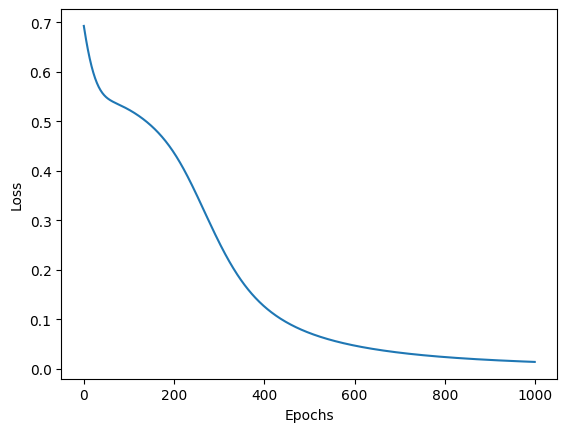

Training Losses are 
          0
0  0.781806
1  0.767544
2  0.753749
3  0.740428
4  0.727591
Validation Data
Confusion Matrix for hidden layer 16 and 64
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979

Test Data
Confusion Matrix for hiden layer 16 and 64
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979



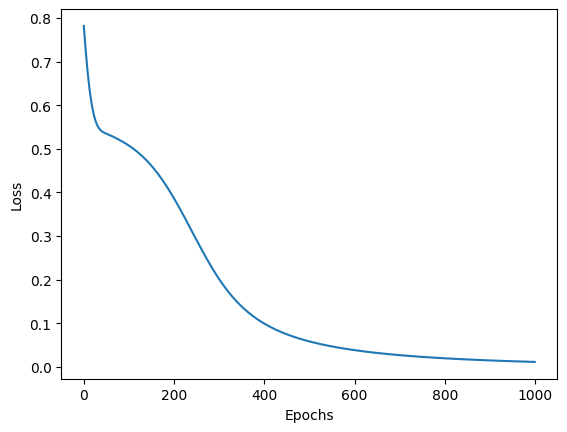

Training Losses are 
          0
0  0.680871
1  0.677599
2  0.674358
3  0.671147
4  0.667970
Validation Data
Confusion Matrix for hidden layer 32 and 8
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979

Test Data
Confusion Matrix for hiden layer 32 and 8
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979



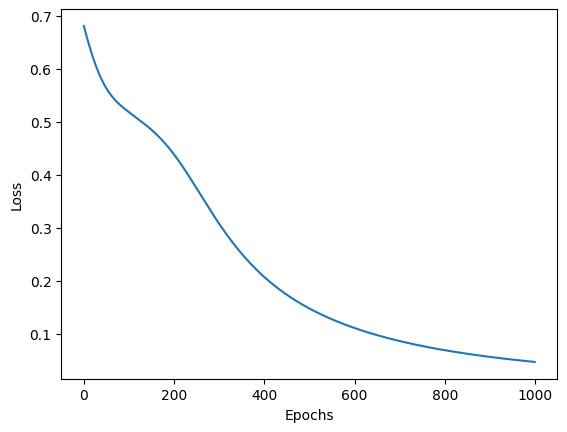

Training Losses are 
          0
0  0.744508
1  0.739050
2  0.733679
3  0.728394
4  0.723198
Validation Data
Confusion Matrix for hidden layer 32 and 16
[[3040    4]
 [   1  955]]
Accuracy: 0.9988, Precision: 0.9958, Recall: 0.9990, F1-score: 0.9974

Test Data
Confusion Matrix for hiden layer 32 and 16
[[3040    4]
 [   1  955]]
Accuracy: 0.9988, Precision: 0.9958, Recall: 0.9990, F1-score: 0.9974



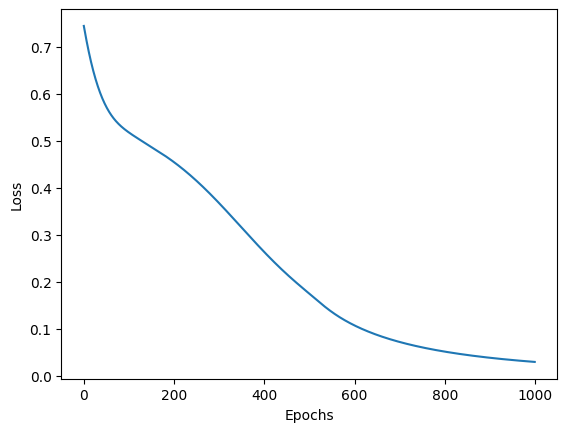

Training Losses are 
          0
0  0.848633
1  0.837545
2  0.826680
3  0.816043
4  0.805636
Validation Data
Confusion Matrix for hidden layer 32 and 32
[[3040    4]
 [   1  955]]
Accuracy: 0.9988, Precision: 0.9958, Recall: 0.9990, F1-score: 0.9974

Test Data
Confusion Matrix for hiden layer 32 and 32
[[3040    4]
 [   2  954]]
Accuracy: 0.9985, Precision: 0.9958, Recall: 0.9979, F1-score: 0.9969



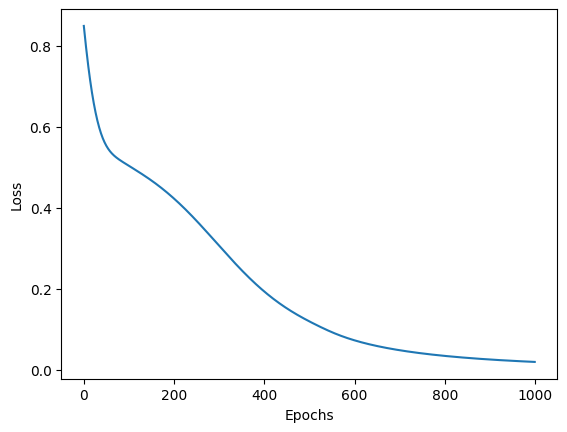

Training Losses are 
          0
0  0.562832
1  0.559378
2  0.556449
3  0.554040
4  0.552134
Validation Data
Confusion Matrix for hidden layer 32 and 64
[[3041    3]
 [   0  956]]
Accuracy: 0.9992, Precision: 0.9969, Recall: 1.0000, F1-score: 0.9984

Test Data
Confusion Matrix for hiden layer 32 and 64
[[3043    1]
 [   0  956]]
Accuracy: 0.9998, Precision: 0.9990, Recall: 1.0000, F1-score: 0.9995



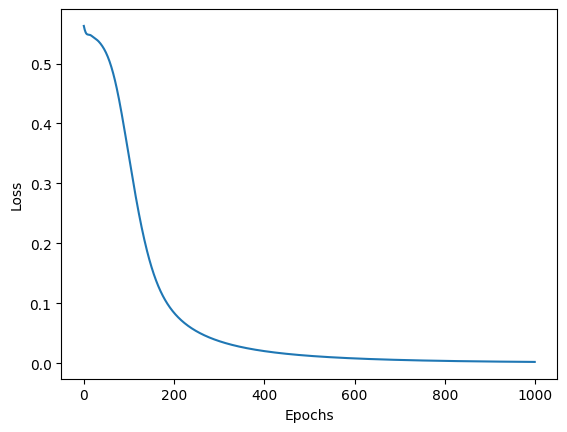

Training Losses are 
          0
0  0.902246
1  0.892669
2  0.883242
3  0.873972
4  0.864864
Validation Data
Confusion Matrix for hidden layer 64 and 8
[[3040    4]
 [   1  955]]
Accuracy: 0.9988, Precision: 0.9958, Recall: 0.9990, F1-score: 0.9974

Test Data
Confusion Matrix for hiden layer 64 and 8
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979



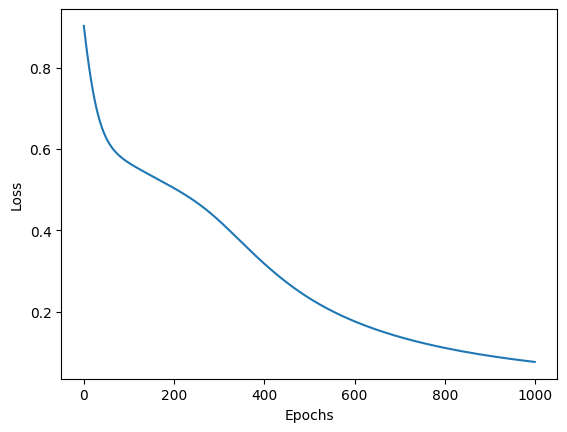

Training Losses are 
          0
0  0.674767
1  0.668194
2  0.661800
3  0.655587
4  0.649561
Validation Data
Confusion Matrix for hidden layer 64 and 16
[[3041    3]
 [   0  956]]
Accuracy: 0.9992, Precision: 0.9969, Recall: 1.0000, F1-score: 0.9984

Test Data
Confusion Matrix for hiden layer 64 and 16
[[3043    1]
 [   0  956]]
Accuracy: 0.9998, Precision: 0.9990, Recall: 1.0000, F1-score: 0.9995



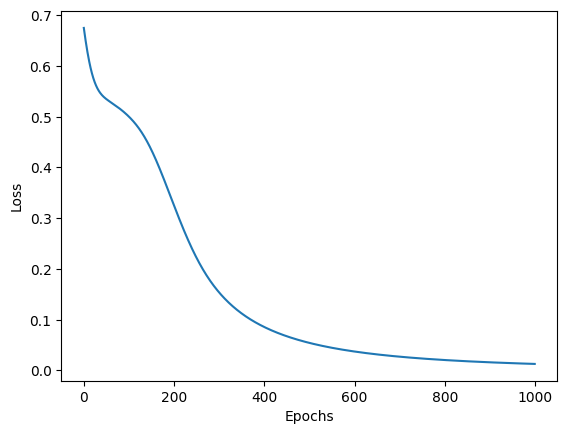

Training Losses are 
          0
0  0.617389
1  0.610636
2  0.604225
3  0.598162
4  0.592452
Validation Data
Confusion Matrix for hidden layer 64 and 32
[[3041    3]
 [   0  956]]
Accuracy: 0.9992, Precision: 0.9969, Recall: 1.0000, F1-score: 0.9984

Test Data
Confusion Matrix for hiden layer 64 and 32
[[3043    1]
 [   0  956]]
Accuracy: 0.9998, Precision: 0.9990, Recall: 1.0000, F1-score: 0.9995



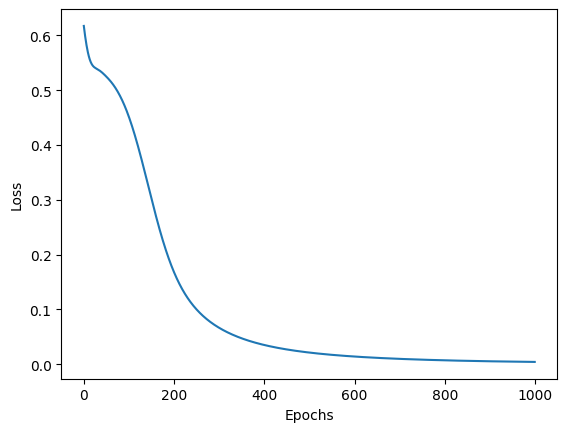

In [ ]:
nuerons = [8,16,32,64]
best_degree_3=0
best_accuracy_2=0

for nueron in nuerons:
  for double_nueron in nuerons:
    model = DoubleLayer(50,nueron,double_nueron)
    criterion = nn.BCELoss() #Binary Classifiaction Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    epochs=1000
    loss_arr=[]
    for i in range(epochs):
          optimizer.zero_grad()
          model.train()
          outputs=model(X_train)
          outputs = outputs.view(-1, 1)
          loss = criterion(outputs, y_train.float())
          loss_arr.append(loss.detach().numpy())
          loss.backward()
          optimizer.step()
    print("Training Losses are ")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val)
    y_val_pred=(y_val_pred>0.5).float()
    cm = confusion_matrix(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val.numpy(), y_val_pred.numpy())
    recall = recall_score(y_val.numpy(), y_val_pred.numpy())
    f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
    print("Validation Data")
    print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    y_test_pred=model(X_test)
    y_test_pred=(y_test_pred>0.5).float()
    cm = confusion_matrix(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    if acc > best_accuracy_2:
          best_accuracy_2=acc
          best_degree_4=nueron
    precision = precision_score(y_test.numpy(), y_test_pred.numpy())
    recall = recall_score(y_test.numpy(), y_test_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
    print("Test Data")
    print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    plt.plot(range(epochs), loss_arr)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
print(f"Best accuracy for test data is {best_accuracy_2} for degree {best_degree_4}")

In [ ]:
class TripleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2,hidden3):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, hidden3),
        nn.Sigmoid(),
        nn.Linear(hidden3, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.677576
1  0.676029
2  0.674488
3  0.672955
4  0.671428
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 8
[[3038    6]
 [   4  952]]
Accuracy: 0.9975, Precision: 0.9937, Recall: 0.9958, F1-score: 0.9948

Test Data
Confusion Matrix for hiden layer 8 and 8 and 8
[[3041    3]
 [   7  949]]
Accuracy: 0.9975, Precision: 0.9968, Recall: 0.9927, F1-score: 0.9948



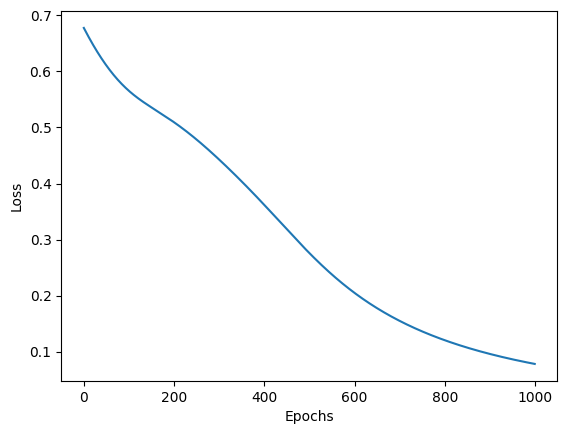

Training Losses are 
          0
0  0.670048
1  0.668375
2  0.666712
3  0.665061
4  0.663420
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 16
[[3038    6]
 [   4  952]]
Accuracy: 0.9975, Precision: 0.9937, Recall: 0.9958, F1-score: 0.9948

Test Data
Confusion Matrix for hiden layer 8 and 8 and 16
[[3040    4]
 [   7  949]]
Accuracy: 0.9972, Precision: 0.9958, Recall: 0.9927, F1-score: 0.9942



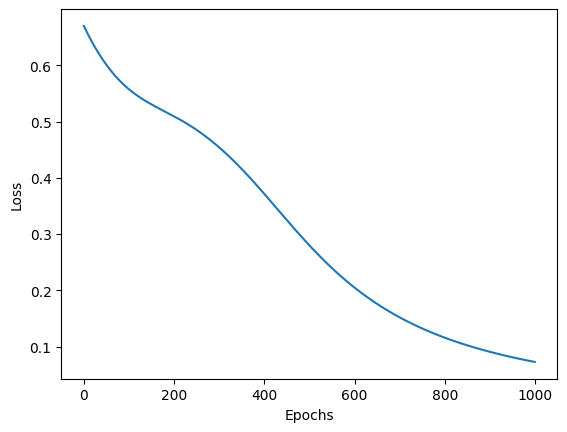

Training Losses are 
          0
0  0.881489
1  0.878577
2  0.875677
3  0.872790
4  0.869916
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 32
[[3039    5]
 [  73  883]]
Accuracy: 0.9805, Precision: 0.9944, Recall: 0.9236, F1-score: 0.9577

Test Data
Confusion Matrix for hiden layer 8 and 8 and 32
[[3040    4]
 [  58  898]]
Accuracy: 0.9845, Precision: 0.9956, Recall: 0.9393, F1-score: 0.9666



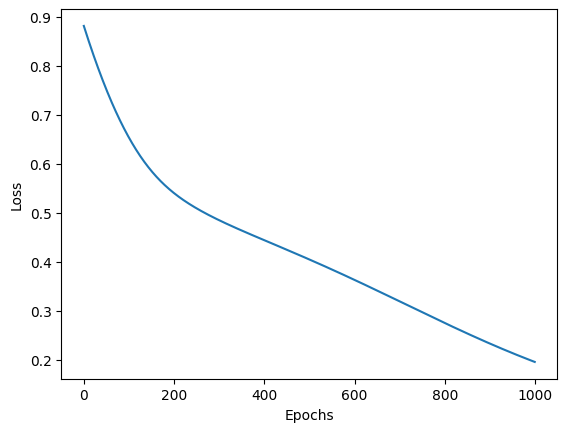

Training Losses are 
          0
0  0.712579
1  0.710751
2  0.708938
3  0.707139
4  0.705355
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 64
[[3038    6]
 [  13  943]]
Accuracy: 0.9952, Precision: 0.9937, Recall: 0.9864, F1-score: 0.9900

Test Data
Confusion Matrix for hiden layer 8 and 8 and 64
[[3040    4]
 [  19  937]]
Accuracy: 0.9942, Precision: 0.9957, Recall: 0.9801, F1-score: 0.9879



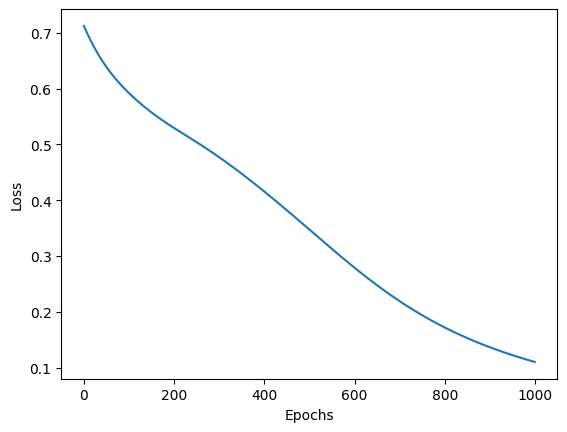

Training Losses are 
          0
0  0.722911
1  0.719432
2  0.715992
3  0.712592
4  0.709234
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 8
[[3038    6]
 [   2  954]]
Accuracy: 0.9980, Precision: 0.9938, Recall: 0.9979, F1-score: 0.9958

Test Data
Confusion Matrix for hiden layer 8 and 16 and 8
[[3040    4]
 [   7  949]]
Accuracy: 0.9972, Precision: 0.9958, Recall: 0.9927, F1-score: 0.9942



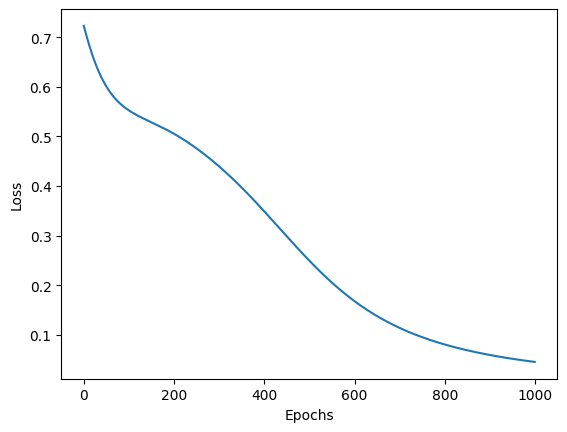

Training Losses are 
          0
0  0.610054
1  0.608068
2  0.606114
3  0.604193
4  0.602305
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 16
[[3038    6]
 [   2  954]]
Accuracy: 0.9980, Precision: 0.9938, Recall: 0.9979, F1-score: 0.9958

Test Data
Confusion Matrix for hiden layer 8 and 16 and 16
[[3040    4]
 [   2  954]]
Accuracy: 0.9985, Precision: 0.9958, Recall: 0.9979, F1-score: 0.9969



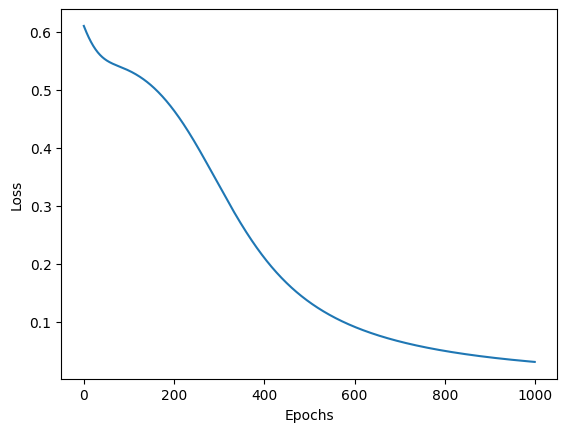

Training Losses are 
          0
0  0.593459
1  0.591638
2  0.589854
3  0.588108
4  0.586400
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 32
[[3038    6]
 [   2  954]]
Accuracy: 0.9980, Precision: 0.9938, Recall: 0.9979, F1-score: 0.9958

Test Data
Confusion Matrix for hiden layer 8 and 16 and 32
[[3041    3]
 [   2  954]]
Accuracy: 0.9988, Precision: 0.9969, Recall: 0.9979, F1-score: 0.9974



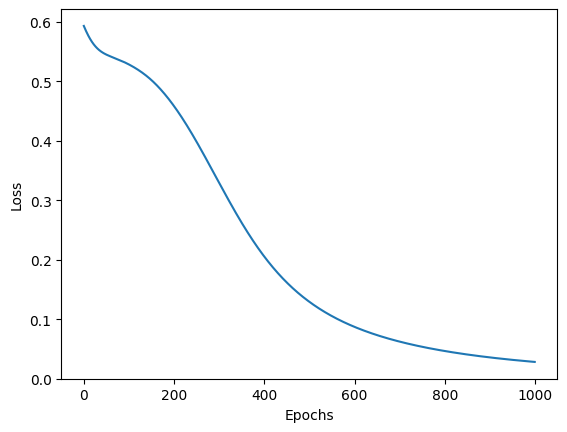

Training Losses are 
          0
0  0.737640
1  0.734129
2  0.730655
3  0.727219
4  0.723820
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 64
[[3037    7]
 [   2  954]]
Accuracy: 0.9978, Precision: 0.9927, Recall: 0.9979, F1-score: 0.9953

Test Data
Confusion Matrix for hiden layer 8 and 16 and 64
[[3040    4]
 [   7  949]]
Accuracy: 0.9972, Precision: 0.9958, Recall: 0.9927, F1-score: 0.9942



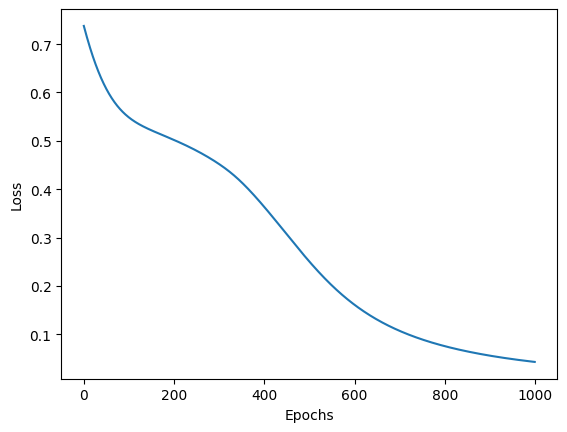

Training Losses are 
          0
0  0.718220
1  0.712308
2  0.706503
3  0.700807
4  0.695223
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 8
[[3039    5]
 [   1  955]]
Accuracy: 0.9985, Precision: 0.9948, Recall: 0.9990, F1-score: 0.9969

Test Data
Confusion Matrix for hiden layer 8 and 32 and 8
[[3041    3]
 [   2  954]]
Accuracy: 0.9988, Precision: 0.9969, Recall: 0.9979, F1-score: 0.9974



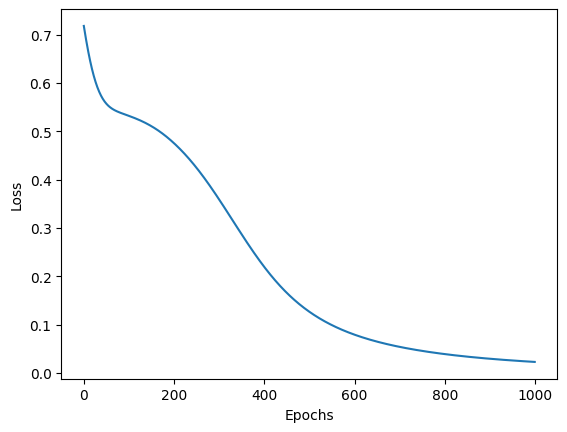

Training Losses are 
          0
0  0.765924
1  0.759276
2  0.752745
3  0.746331
4  0.740038
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 16
[[3039    5]
 [   1  955]]
Accuracy: 0.9985, Precision: 0.9948, Recall: 0.9990, F1-score: 0.9969

Test Data
Confusion Matrix for hiden layer 8 and 32 and 16
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979



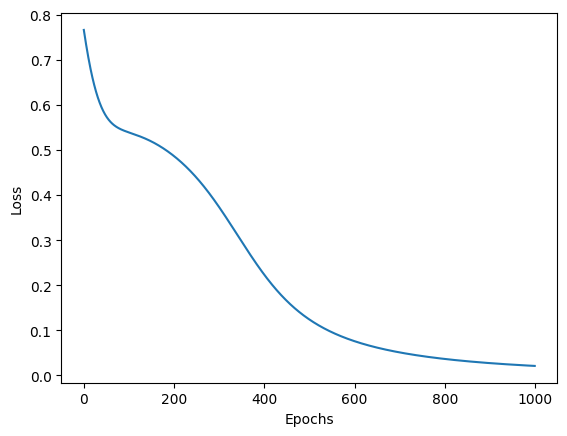

Training Losses are 
          0
0  0.616446
1  0.612917
2  0.609490
3  0.606166
4  0.602946
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 32
[[3039    5]
 [   1  955]]
Accuracy: 0.9985, Precision: 0.9948, Recall: 0.9990, F1-score: 0.9969

Test Data
Confusion Matrix for hiden layer 8 and 32 and 32
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979



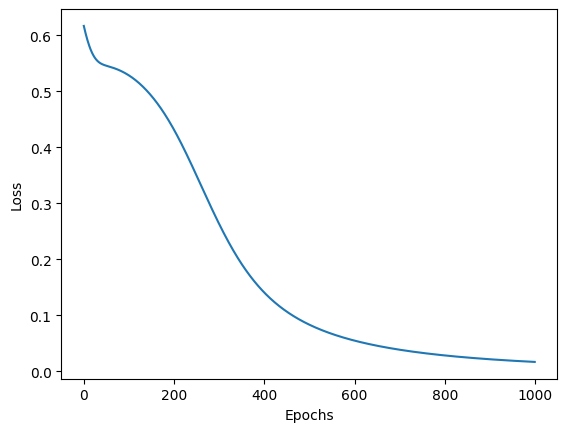

Training Losses are 
          0
0  0.647733
1  0.643135
2  0.638652
3  0.634287
4  0.630039
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 64
[[3039    5]
 [   1  955]]
Accuracy: 0.9985, Precision: 0.9948, Recall: 0.9990, F1-score: 0.9969

Test Data
Confusion Matrix for hiden layer 8 and 32 and 64
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979



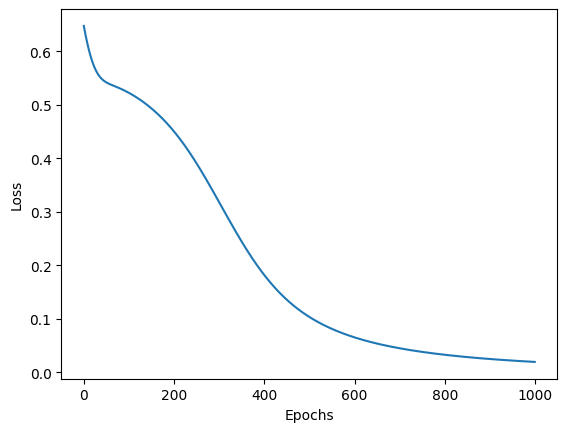

Training Losses are 
          0
0  0.761035
1  0.748725
2  0.736814
3  0.725309
4  0.714216
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 8
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979

Test Data
Confusion Matrix for hiden layer 8 and 64 and 8
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979



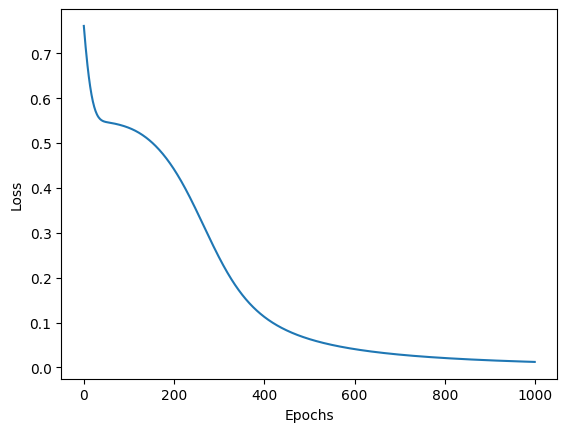

Training Losses are 
          0
0  0.842185
1  0.828065
2  0.814306
3  0.800915
4  0.787898
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 16
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979

Test Data
Confusion Matrix for hiden layer 8 and 64 and 16
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979



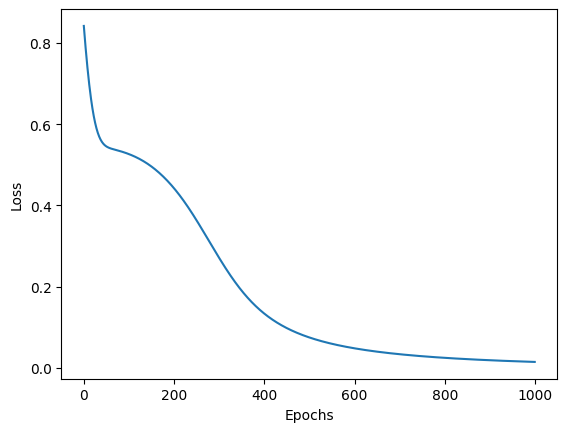

Training Losses are 
          0
0  0.629313
1  0.622131
2  0.615304
3  0.608837
4  0.602729
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 32
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979

Test Data
Confusion Matrix for hiden layer 8 and 64 and 32
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979



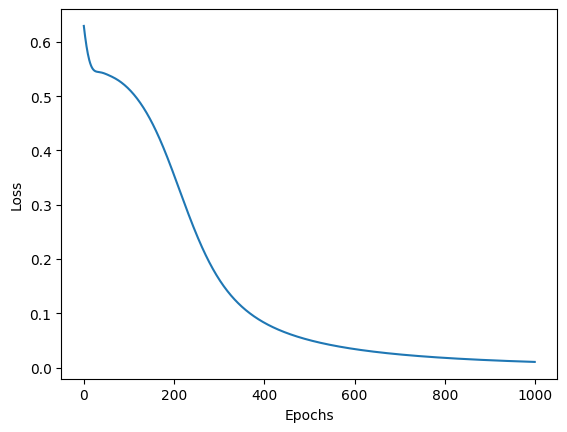

Training Losses are 
          0
0  0.694922
1  0.685066
2  0.675576
3  0.666458
4  0.657714
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 64
[[3041    3]
 [   0  956]]
Accuracy: 0.9992, Precision: 0.9969, Recall: 1.0000, F1-score: 0.9984

Test Data
Confusion Matrix for hiden layer 8 and 64 and 64
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979



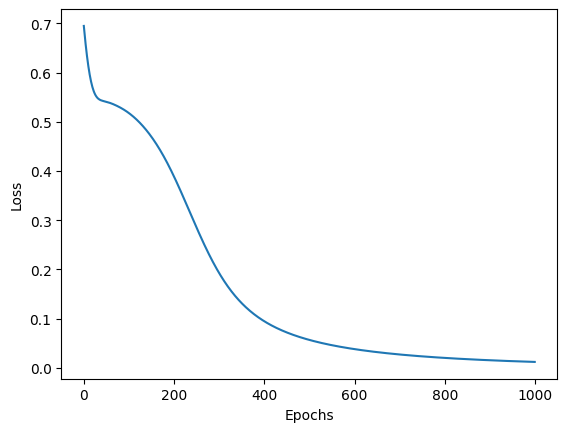

Training Losses are 
          0
0  0.661531
1  0.659713
2  0.657909
3  0.656121
4  0.654347
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 8
[[3039    5]
 [   2  954]]
Accuracy: 0.9982, Precision: 0.9948, Recall: 0.9979, F1-score: 0.9963

Test Data
Confusion Matrix for hiden layer 16 and 8 and 8
[[3041    3]
 [   2  954]]
Accuracy: 0.9988, Precision: 0.9969, Recall: 0.9979, F1-score: 0.9974



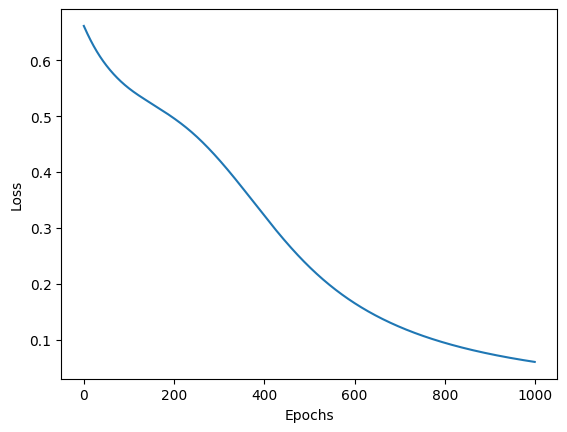

Training Losses are 
          0
0  0.737959
1  0.735545
2  0.733150
3  0.730773
4  0.728415
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 16
[[3039    5]
 [   2  954]]
Accuracy: 0.9982, Precision: 0.9948, Recall: 0.9979, F1-score: 0.9963

Test Data
Confusion Matrix for hiden layer 16 and 8 and 16
[[3041    3]
 [   2  954]]
Accuracy: 0.9988, Precision: 0.9969, Recall: 0.9979, F1-score: 0.9974



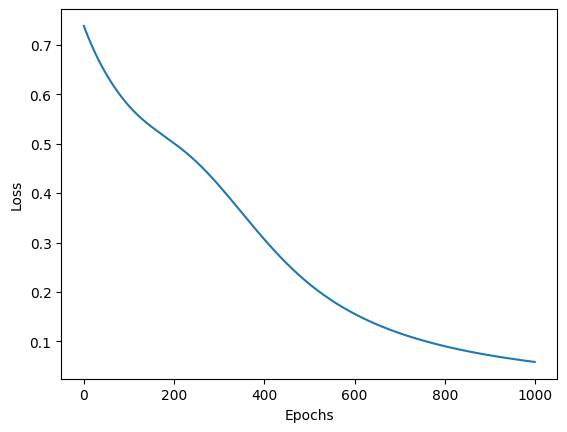

Training Losses are 
          0
0  0.551616
1  0.551235
2  0.550866
3  0.550508
4  0.550161
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 32
[[3041    3]
 [   7  949]]
Accuracy: 0.9975, Precision: 0.9968, Recall: 0.9927, F1-score: 0.9948

Test Data
Confusion Matrix for hiden layer 16 and 8 and 32
[[3041    3]
 [  13  943]]
Accuracy: 0.9960, Precision: 0.9968, Recall: 0.9864, F1-score: 0.9916



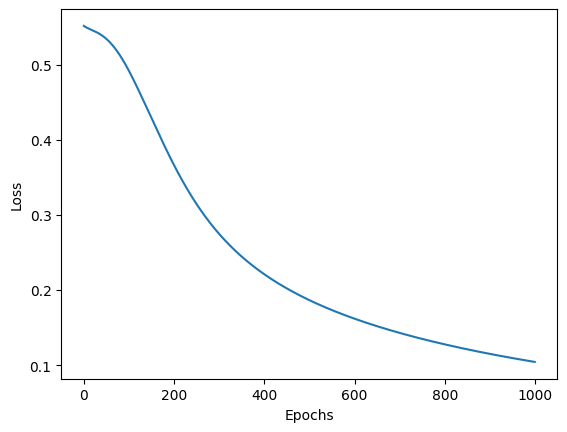

Training Losses are 
          0
0  0.670272
1  0.668040
2  0.665824
3  0.663624
4  0.661440
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 64
[[3039    5]
 [   3  953]]
Accuracy: 0.9980, Precision: 0.9948, Recall: 0.9969, F1-score: 0.9958

Test Data
Confusion Matrix for hiden layer 16 and 8 and 64
[[3040    4]
 [   7  949]]
Accuracy: 0.9972, Precision: 0.9958, Recall: 0.9927, F1-score: 0.9942



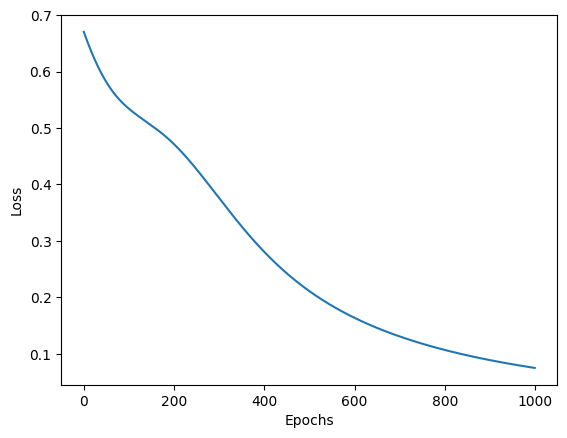

Training Losses are 
          0
0  0.759893
1  0.755357
2  0.750879
3  0.746461
4  0.742103
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 8
[[3039    5]
 [   2  954]]
Accuracy: 0.9982, Precision: 0.9948, Recall: 0.9979, F1-score: 0.9963

Test Data
Confusion Matrix for hiden layer 16 and 16 and 8
[[3041    3]
 [   2  954]]
Accuracy: 0.9988, Precision: 0.9969, Recall: 0.9979, F1-score: 0.9974



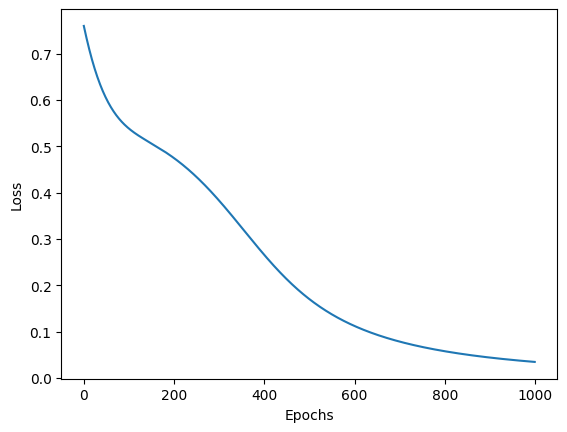

Training Losses are 
          0
0  0.747579
1  0.743011
2  0.738503
3  0.734056
4  0.729672
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 16
[[3039    5]
 [   1  955]]
Accuracy: 0.9985, Precision: 0.9948, Recall: 0.9990, F1-score: 0.9969

Test Data
Confusion Matrix for hiden layer 16 and 16 and 16
[[3040    4]
 [   1  955]]
Accuracy: 0.9988, Precision: 0.9958, Recall: 0.9990, F1-score: 0.9974



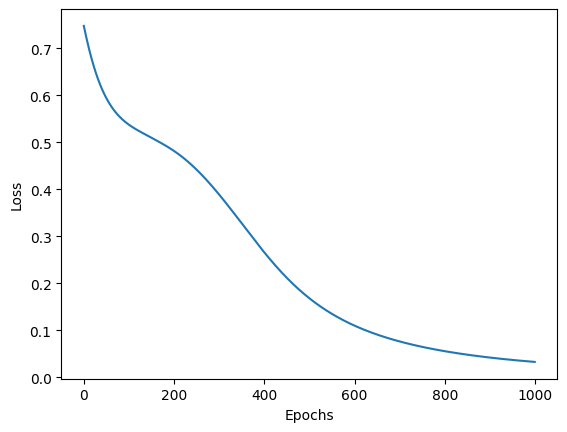

Training Losses are 
          0
0  0.795089
1  0.790014
2  0.784987
3  0.780011
4  0.775084
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 32
[[3038    6]
 [   2  954]]
Accuracy: 0.9980, Precision: 0.9938, Recall: 0.9979, F1-score: 0.9958

Test Data
Confusion Matrix for hiden layer 16 and 16 and 32
[[3040    4]
 [   2  954]]
Accuracy: 0.9985, Precision: 0.9958, Recall: 0.9979, F1-score: 0.9969



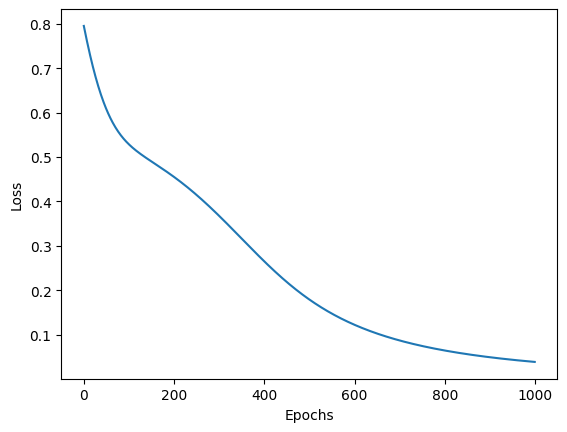

Training Losses are 
          0
0  0.585476
1  0.583595
2  0.581760
3  0.579973
4  0.578233
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 64
[[3041    3]
 [   0  956]]
Accuracy: 0.9992, Precision: 0.9969, Recall: 1.0000, F1-score: 0.9984

Test Data
Confusion Matrix for hiden layer 16 and 16 and 64
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979



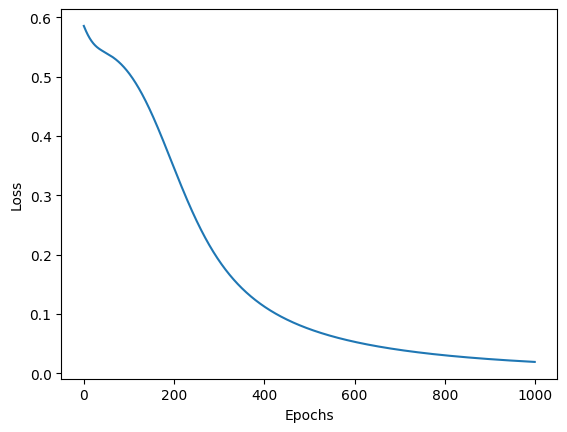

Training Losses are 
          0
0  0.776548
1  0.768394
2  0.760385
3  0.752523
4  0.744811
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 8
[[3039    5]
 [   2  954]]
Accuracy: 0.9982, Precision: 0.9948, Recall: 0.9979, F1-score: 0.9963

Test Data
Confusion Matrix for hiden layer 16 and 32 and 8
[[3041    3]
 [   2  954]]
Accuracy: 0.9988, Precision: 0.9969, Recall: 0.9979, F1-score: 0.9974



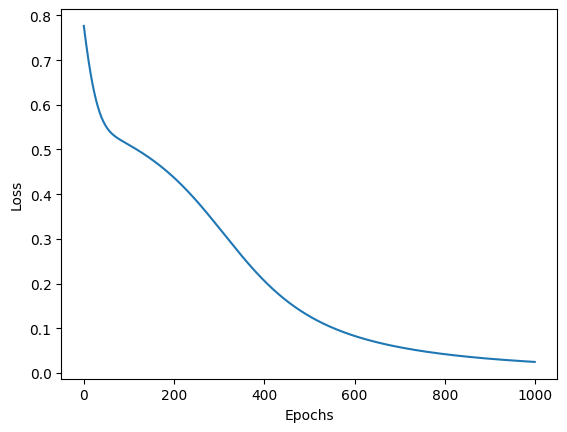

Training Losses are 
          0
0  0.832808
1  0.823923
2  0.815194
3  0.806621
4  0.798209
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 16
[[3038    6]
 [   2  954]]
Accuracy: 0.9980, Precision: 0.9938, Recall: 0.9979, F1-score: 0.9958

Test Data
Confusion Matrix for hiden layer 16 and 32 and 16
[[3041    3]
 [   6  950]]
Accuracy: 0.9978, Precision: 0.9969, Recall: 0.9937, F1-score: 0.9953



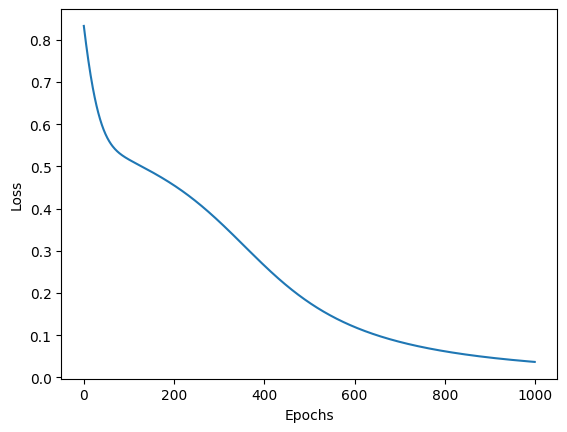

Training Losses are 
          0
0  0.751008
1  0.743230
2  0.735608
3  0.728147
4  0.720848
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 32
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979

Test Data
Confusion Matrix for hiden layer 16 and 32 and 32
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979



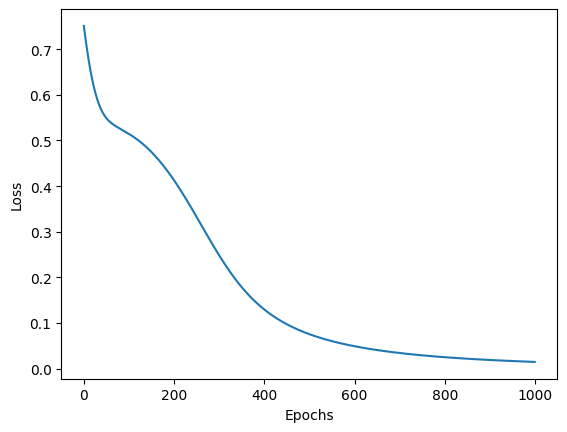

Training Losses are 
          0
0  0.780367
1  0.772319
2  0.764437
3  0.756725
4  0.749183
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 64
[[3039    5]
 [   1  955]]
Accuracy: 0.9985, Precision: 0.9948, Recall: 0.9990, F1-score: 0.9969

Test Data
Confusion Matrix for hiden layer 16 and 32 and 64
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979



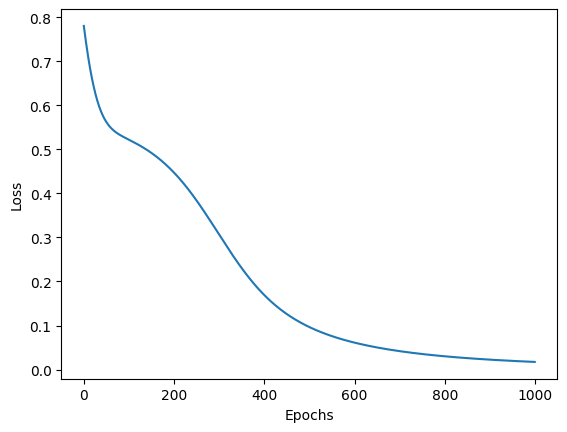

Training Losses are 
          0
0  0.589316
1  0.583978
2  0.579031
3  0.574476
4  0.570314
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 8
[[3041    3]
 [   0  956]]
Accuracy: 0.9992, Precision: 0.9969, Recall: 1.0000, F1-score: 0.9984

Test Data
Confusion Matrix for hiden layer 16 and 64 and 8
[[3043    1]
 [   0  956]]
Accuracy: 0.9998, Precision: 0.9990, Recall: 1.0000, F1-score: 0.9995



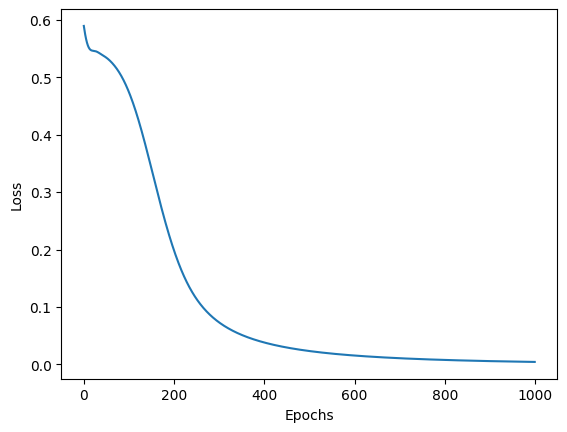

Training Losses are 
          0
0  0.675811
1  0.665339
2  0.655350
3  0.645848
4  0.636834
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 16
[[3041    3]
 [   0  956]]
Accuracy: 0.9992, Precision: 0.9969, Recall: 1.0000, F1-score: 0.9984

Test Data
Confusion Matrix for hiden layer 16 and 64 and 16
[[3041    3]
 [   0  956]]
Accuracy: 0.9992, Precision: 0.9969, Recall: 1.0000, F1-score: 0.9984



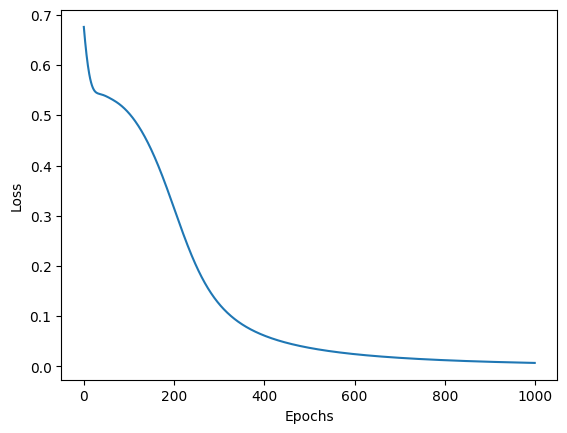

Training Losses are 
          0
0  0.607563
1  0.600724
2  0.594340
3  0.588412
4  0.582941
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 32
[[3041    3]
 [   0  956]]
Accuracy: 0.9992, Precision: 0.9969, Recall: 1.0000, F1-score: 0.9984

Test Data
Confusion Matrix for hiden layer 16 and 64 and 32
[[3043    1]
 [   0  956]]
Accuracy: 0.9998, Precision: 0.9990, Recall: 1.0000, F1-score: 0.9995



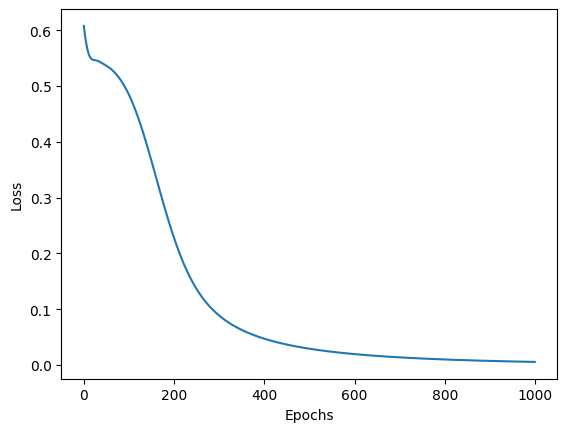

Training Losses are 
          0
0  0.701538
1  0.690731
2  0.680345
3  0.670384
4  0.660856
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 64
[[3041    3]
 [   0  956]]
Accuracy: 0.9992, Precision: 0.9969, Recall: 1.0000, F1-score: 0.9984

Test Data
Confusion Matrix for hiden layer 16 and 64 and 64
[[3041    3]
 [   0  956]]
Accuracy: 0.9992, Precision: 0.9969, Recall: 1.0000, F1-score: 0.9984



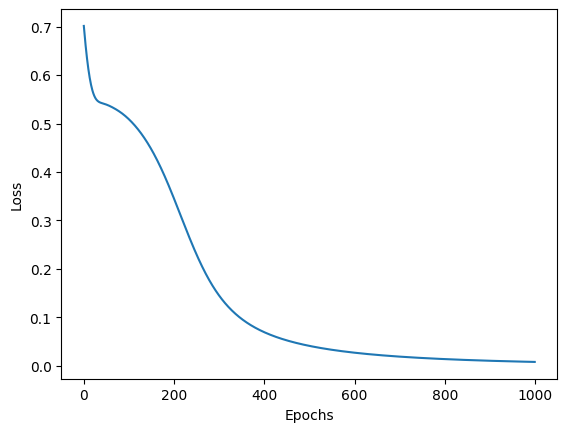

Training Losses are 
          0
0  0.589082
1  0.587571
2  0.586089
3  0.584636
4  0.583211
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 8
[[3041    3]
 [   0  956]]
Accuracy: 0.9992, Precision: 0.9969, Recall: 1.0000, F1-score: 0.9984

Test Data
Confusion Matrix for hiden layer 32 and 8 and 8
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979



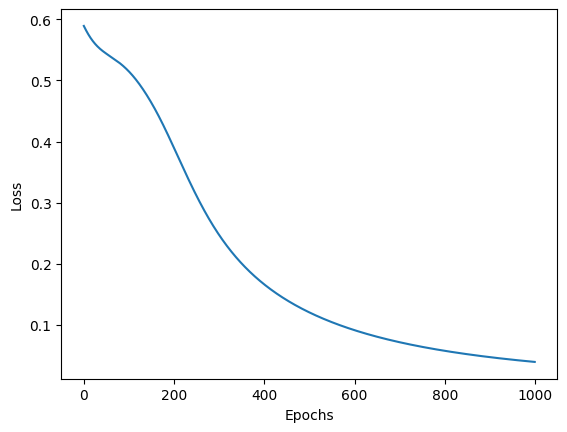

Training Losses are 
          0
0  0.849317
1  0.844972
2  0.840667
3  0.836403
4  0.832181
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 16
[[3039    5]
 [   1  955]]
Accuracy: 0.9985, Precision: 0.9948, Recall: 0.9990, F1-score: 0.9969

Test Data
Confusion Matrix for hiden layer 32 and 8 and 16
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979



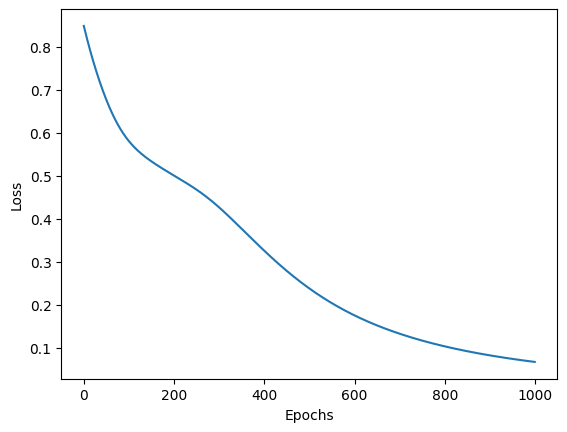

Training Losses are 
          0
0  0.728597
1  0.725633
2  0.722688
3  0.719764
4  0.716860
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 32
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979

Test Data
Confusion Matrix for hiden layer 32 and 8 and 32
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979



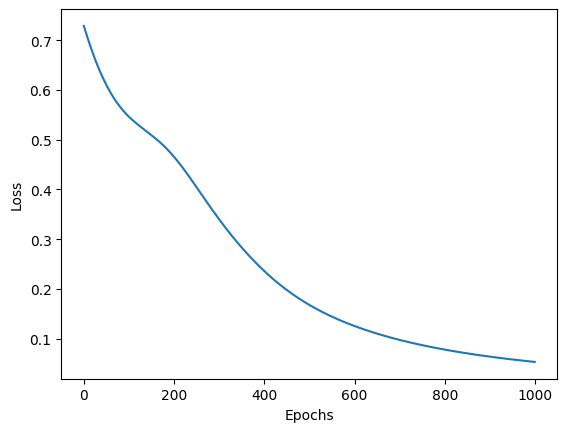

Training Losses are 
          0
0  0.627361
1  0.625466
2  0.623585
3  0.621720
4  0.619871
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 64
[[3041    3]
 [   0  956]]
Accuracy: 0.9992, Precision: 0.9969, Recall: 1.0000, F1-score: 0.9984

Test Data
Confusion Matrix for hiden layer 32 and 8 and 64
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979



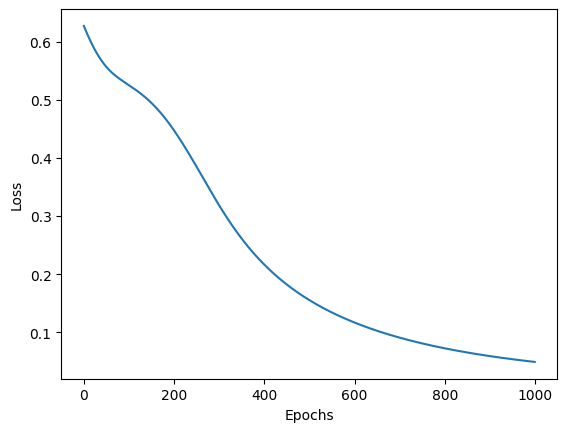

Training Losses are 
          0
0  0.875716
1  0.868842
2  0.862052
3  0.855346
4  0.848726
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 8
[[3038    6]
 [   3  953]]
Accuracy: 0.9978, Precision: 0.9937, Recall: 0.9969, F1-score: 0.9953

Test Data
Confusion Matrix for hiden layer 32 and 16 and 8
[[3041    3]
 [   7  949]]
Accuracy: 0.9975, Precision: 0.9968, Recall: 0.9927, F1-score: 0.9948



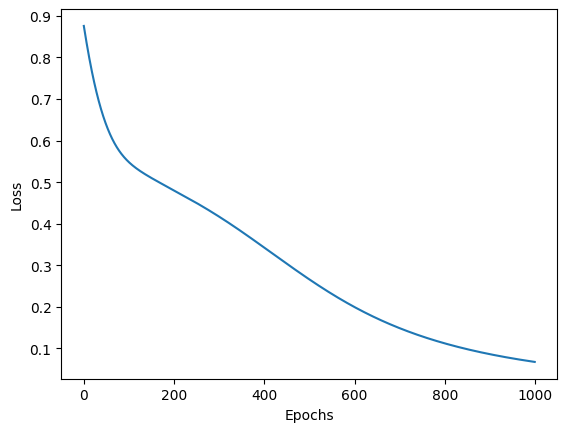

Training Losses are 
          0
0  0.778426
1  0.772354
2  0.766377
3  0.760493
4  0.754705
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 16
[[3040    4]
 [   1  955]]
Accuracy: 0.9988, Precision: 0.9958, Recall: 0.9990, F1-score: 0.9974

Test Data
Confusion Matrix for hiden layer 32 and 16 and 16
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979



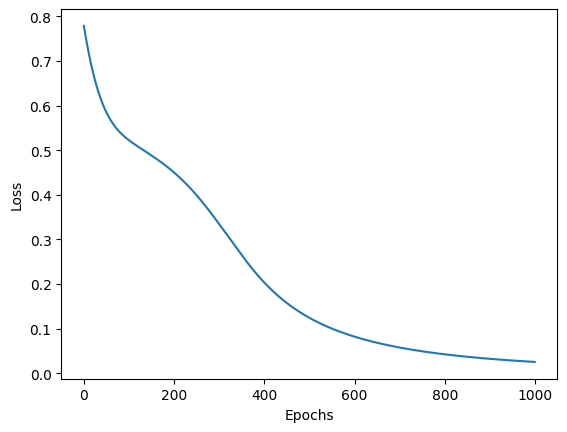

Training Losses are 
          0
0  0.652224
1  0.648113
2  0.644084
3  0.640137
4  0.636272
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 32
[[3041    3]
 [   0  956]]
Accuracy: 0.9992, Precision: 0.9969, Recall: 1.0000, F1-score: 0.9984

Test Data
Confusion Matrix for hiden layer 32 and 16 and 32
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979



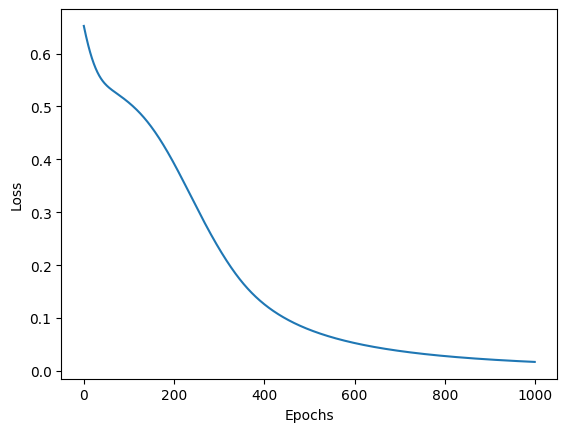

Training Losses are 
          0
0  0.769824
1  0.764061
2  0.758390
3  0.752812
4  0.747329
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 64
[[3041    3]
 [   0  956]]
Accuracy: 0.9992, Precision: 0.9969, Recall: 1.0000, F1-score: 0.9984

Test Data
Confusion Matrix for hiden layer 32 and 16 and 64
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979



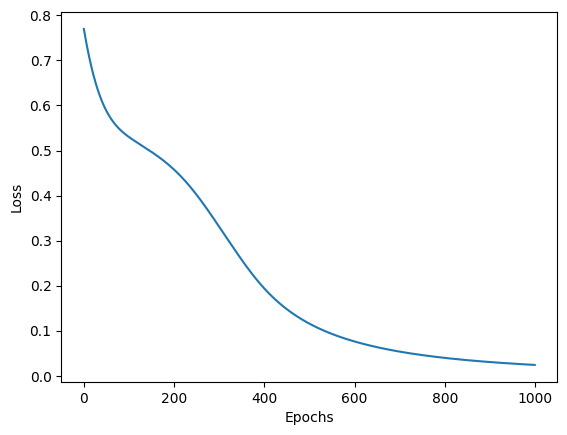

Training Losses are 
          0
0  0.836841
1  0.825527
2  0.814477
3  0.803692
4  0.793175
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 8
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979

Test Data
Confusion Matrix for hiden layer 32 and 32 and 8
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979



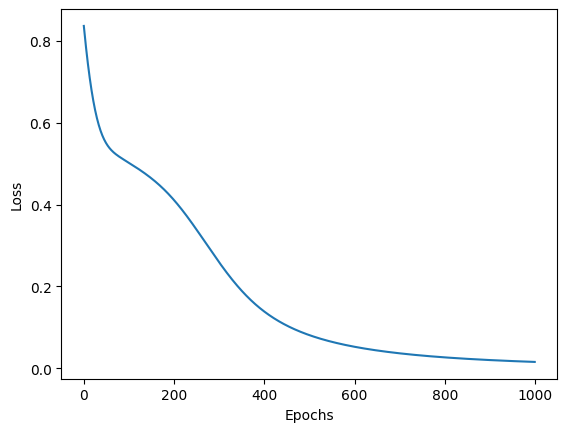

Training Losses are 
          0
0  0.585347
1  0.581432
2  0.577735
3  0.574258
4  0.571002
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 16
[[3041    3]
 [   0  956]]
Accuracy: 0.9992, Precision: 0.9969, Recall: 1.0000, F1-score: 0.9984

Test Data
Confusion Matrix for hiden layer 32 and 32 and 16
[[3043    1]
 [   0  956]]
Accuracy: 0.9998, Precision: 0.9990, Recall: 1.0000, F1-score: 0.9995



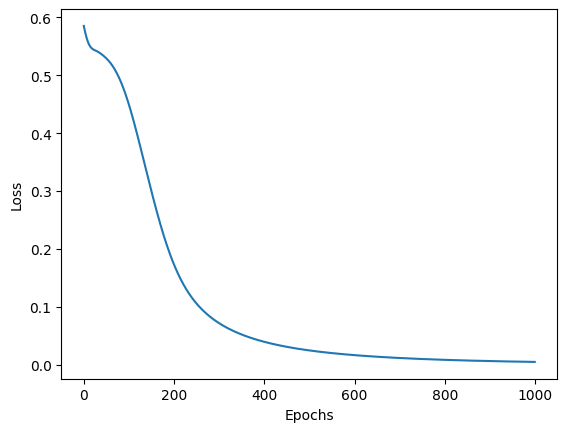

Training Losses are 
          0
0  0.721604
1  0.713341
2  0.705295
3  0.697467
4  0.689861
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 32
[[3041    3]
 [   0  956]]
Accuracy: 0.9992, Precision: 0.9969, Recall: 1.0000, F1-score: 0.9984

Test Data
Confusion Matrix for hiden layer 32 and 32 and 32
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979



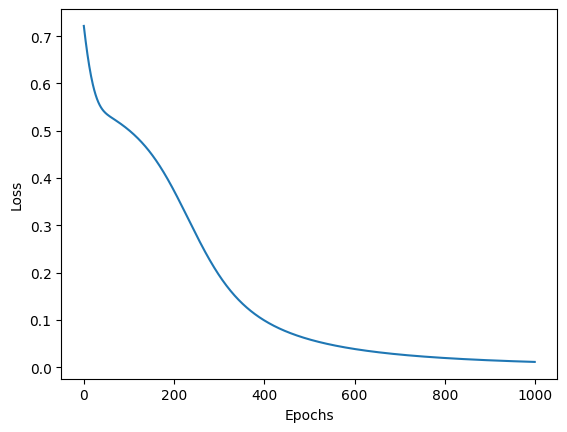

Training Losses are 
          0
0  0.727706
1  0.718532
2  0.709628
3  0.700997
4  0.692640
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 64
[[3041    3]
 [   0  956]]
Accuracy: 0.9992, Precision: 0.9969, Recall: 1.0000, F1-score: 0.9984

Test Data
Confusion Matrix for hiden layer 32 and 32 and 64
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979



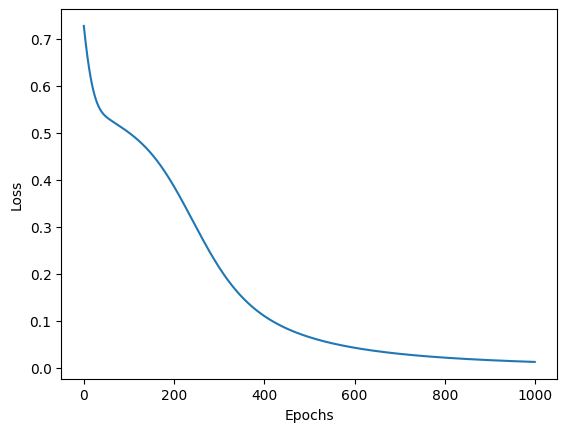

Training Losses are 
          0
0  0.642186
1  0.631558
2  0.621601
3  0.612319
4  0.603714
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 8
[[3041    3]
 [   0  956]]
Accuracy: 0.9992, Precision: 0.9969, Recall: 1.0000, F1-score: 0.9984

Test Data
Confusion Matrix for hiden layer 32 and 64 and 8
[[3043    1]
 [   0  956]]
Accuracy: 0.9998, Precision: 0.9990, Recall: 1.0000, F1-score: 0.9995



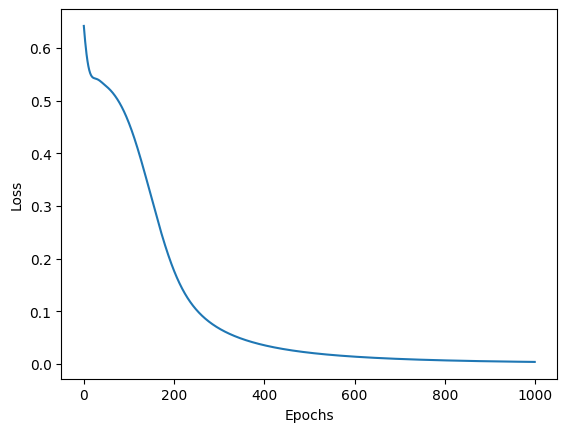

Training Losses are 
          0
0  0.842506
1  0.823634
2  0.805419
3  0.787871
4  0.770997
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 16
[[3041    3]
 [   0  956]]
Accuracy: 0.9992, Precision: 0.9969, Recall: 1.0000, F1-score: 0.9984

Test Data
Confusion Matrix for hiden layer 32 and 64 and 16
[[3041    3]
 [   1  955]]
Accuracy: 0.9990, Precision: 0.9969, Recall: 0.9990, F1-score: 0.9979



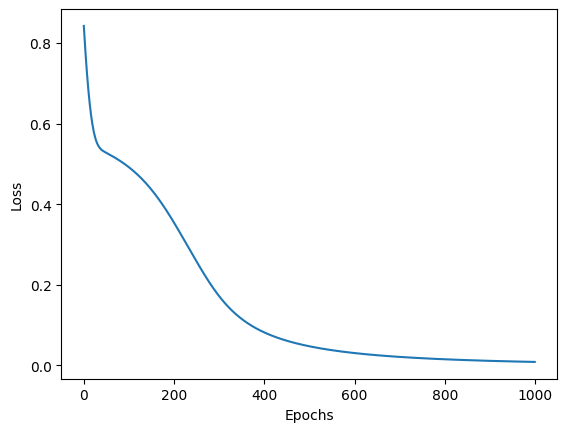

Training Losses are 
          0
0  0.665333
1  0.653593
2  0.642502
3  0.632066
4  0.622286
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 32
[[3041    3]
 [   0  956]]
Accuracy: 0.9992, Precision: 0.9969, Recall: 1.0000, F1-score: 0.9984

Test Data
Confusion Matrix for hiden layer 32 and 64 and 32
[[3043    1]
 [   0  956]]
Accuracy: 0.9998, Precision: 0.9990, Recall: 1.0000, F1-score: 0.9995



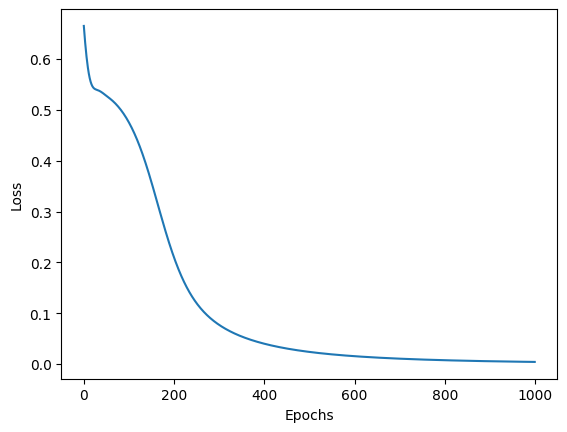

Training Losses are 
          0
0  0.582914
1  0.576891
2  0.571483
3  0.566692
4  0.562510
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 64
[[3041    3]
 [   0  956]]
Accuracy: 0.9992, Precision: 0.9969, Recall: 1.0000, F1-score: 0.9984

Test Data
Confusion Matrix for hiden layer 32 and 64 and 64
[[3043    1]
 [   0  956]]
Accuracy: 0.9998, Precision: 0.9990, Recall: 1.0000, F1-score: 0.9995



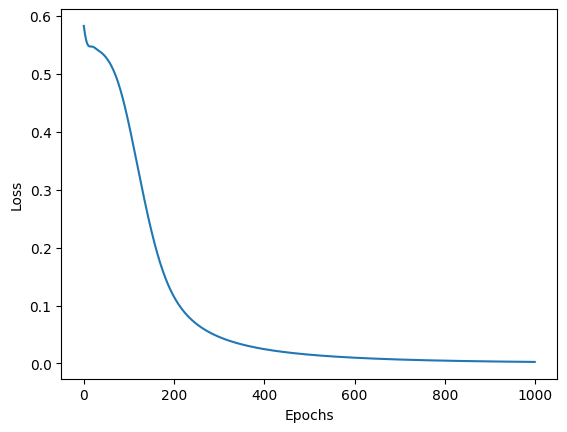

Training Losses are 
          0
0  0.547864
1  0.547351
2  0.546857
3  0.546377
4  0.545906
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 8
[[3041    3]
 [   0  956]]
Accuracy: 0.9992, Precision: 0.9969, Recall: 1.0000, F1-score: 0.9984

Test Data
Confusion Matrix for hiden layer 64 and 8 and 8
[[3043    1]
 [   1  955]]
Accuracy: 0.9995, Precision: 0.9990, Recall: 0.9990, F1-score: 0.9990



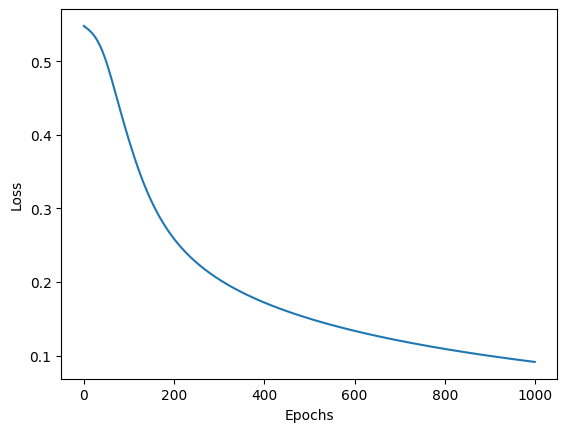

Training Losses are 
          0
0  0.586571
1  0.584187
2  0.581861
3  0.579596
4  0.577394
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 16
[[3041    3]
 [   0  956]]
Accuracy: 0.9992, Precision: 0.9969, Recall: 1.0000, F1-score: 0.9984

Test Data
Confusion Matrix for hiden layer 64 and 8 and 16
[[3043    1]
 [   0  956]]
Accuracy: 0.9998, Precision: 0.9990, Recall: 1.0000, F1-score: 0.9995



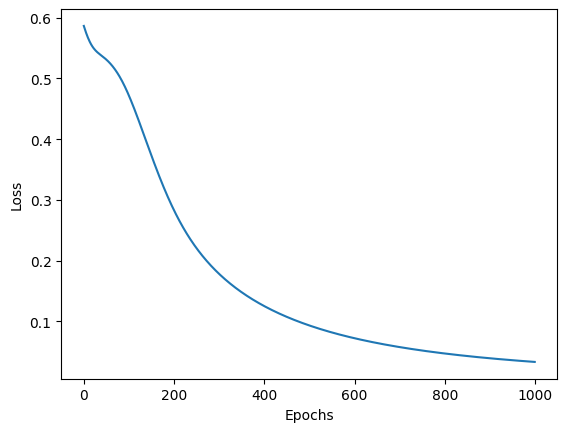

Training Losses are 
          0
0  0.894739
1  0.888949
2  0.883256
3  0.877662
4  0.872170
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 32
[[3041    3]
 [   0  956]]
Accuracy: 0.9992, Precision: 0.9969, Recall: 1.0000, F1-score: 0.9984

Test Data
Confusion Matrix for hiden layer 64 and 8 and 32
[[3042    2]
 [   1  955]]
Accuracy: 0.9992, Precision: 0.9979, Recall: 0.9990, F1-score: 0.9984



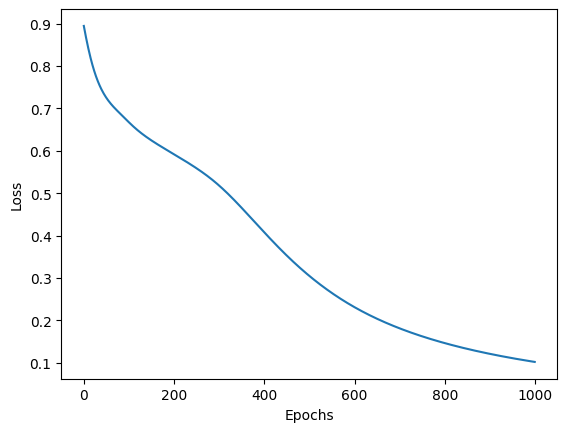

Training Losses are 
          0
0  0.611073
1  0.607554
2  0.604129
3  0.600800
4  0.597569
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 64
[[3041    3]
 [   0  956]]
Accuracy: 0.9992, Precision: 0.9969, Recall: 1.0000, F1-score: 0.9984

Test Data
Confusion Matrix for hiden layer 64 and 8 and 64
[[3043    1]
 [   0  956]]
Accuracy: 0.9998, Precision: 0.9990, Recall: 1.0000, F1-score: 0.9995



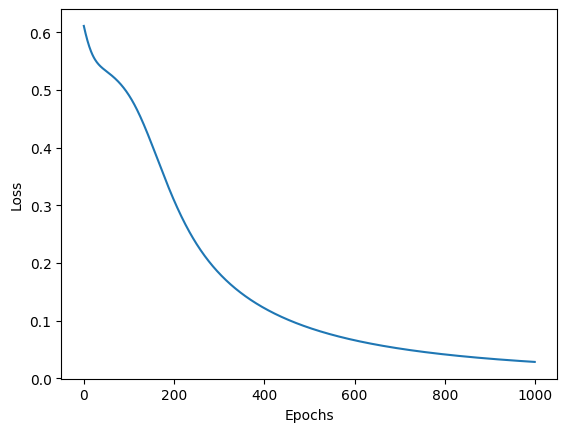

Training Losses are 
          0
0  0.672886
1  0.667251
2  0.661764
3  0.656426
4  0.651238
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 8
[[3041    3]
 [   0  956]]
Accuracy: 0.9992, Precision: 0.9969, Recall: 1.0000, F1-score: 0.9984

Test Data
Confusion Matrix for hiden layer 64 and 16 and 8
[[3043    1]
 [   0  956]]
Accuracy: 0.9998, Precision: 0.9990, Recall: 1.0000, F1-score: 0.9995



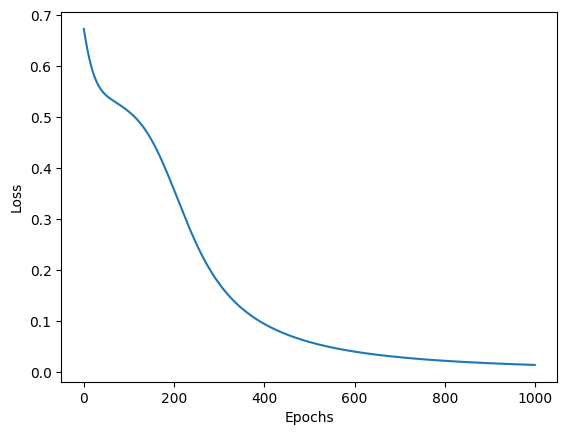

In [ ]:
nuerons = [8,16,32,64]
best_score=0
layer1=0
layer2=0
layer3=0
for nueron in nuerons:
  for double_nueron in nuerons:
    for triple_nueron in nuerons:
      model = TripleLayer(50,nueron,double_nueron,triple_nueron)
      criterion = nn.BCELoss() #Binary Classifiaction Loss
      optimizer = optim.Adam(model.parameters(), lr=0.001)
      epochs=1000
      loss_arr=[]
      for i in range(epochs):
            optimizer.zero_grad()
            model.train()
            outputs=model(X_train)
            outputs = outputs.view(-1, 1)
            loss = criterion(outputs, y_train.float())
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
      print("Training Losses are ")
      loss_df = pd.DataFrame(loss_arr)
      print(loss_df.head())
      y_val_pred=model(X_val)
      y_val_pred=(y_val_pred>0.5).float()
      cm = confusion_matrix(y_val, y_val_pred)
      acc = accuracy_score(y_val, y_val_pred)
      precision = precision_score(y_val.numpy(), y_val_pred.numpy())
      recall = recall_score(y_val.numpy(), y_val_pred.numpy())
      f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
      print("Validation Data")
      print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      y_test_pred=model(X_test)
      y_test_pred=(y_test_pred>0.5).float()
      cm = confusion_matrix(y_test, y_test_pred)
      acc = accuracy_score(y_test, y_test_pred)
      if acc > best_score:
          best_score=acc
          layer1=nueron
          layer2=double_nueron
          layer3=triple_nueron
      precision = precision_score(y_test.numpy(), y_test_pred.numpy())
      recall = recall_score(y_test.numpy(), y_test_pred.numpy())
      f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
      print("Test Data")
      print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      plt.plot(range(epochs), loss_arr)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.show()
print(f"The best accuracy on test data is {best_score} for layers {layer1} , {layer2}, {layer3}")

In [12]:
print(X_training.shape)

(12000, 50)
